In [175]:
import pandas as pd
import os

%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [176]:
# Relative path between notebooks and goruped output directories
relative_path = '../../../outputs/grouped'

# Load lookup tables
transit_route_lookup = pd.read_csv('../inputs/network_summary/transit_route_groups.csv')
transit_time_lookup = pd.read_csv('../inputs/network_summary/transit_time_groups.csv')
special_routes = pd.read_csv('../inputs/network_summary/transit_special_routes.csv')

In [177]:
df = pd.read_csv(os.path.join(relative_path,'transit_boardings.csv'))
df_dict = {}
source_list = df.groupby('source').count().index.tolist()
for source in source_list:
    df_dict[source] = df[df['source'] == source]
    df_dict[source]['route_id'] = df_dict[source]['route_id'].astype('int')
    
    # separate transit agency ID from the route code
    df_dict[source]['agency_id'] = df_dict[source]['route_id'].apply(lambda x: str(x)[0]).astype('int')
    
    df_dict[source] = pd.merge(df_dict[source], transit_route_lookup, left_on='agency_id', right_on='RouteGroupID')
    df_dict[source] = pd.merge(df_dict[source], transit_time_lookup, left_on='tod', right_on='tod')
    df_dict[source] = pd.merge(df_dict[source], special_routes, left_on='route_id', right_on='route_code', how='left',
                              suffixes=['_standard','_special'])
    
tod_lookup = {  '20to5':'ni',
                '5to6':'ni',
                '6to7':'am',
                '7to8':'am',
                '8to9':'am',
                '9to10':'md',
                '10to14':'md',
                '14to15':'md',
                '15to16':'pm',
                '16to17':'pm',
                '17to18':'pm',
                '18to20':'ev'}

In [178]:
pd.options.display.float_format = '{:0,.2f}'.format

# All Routes

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


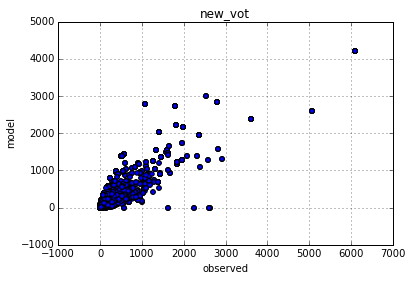

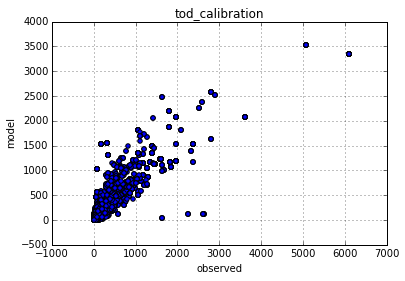

In [179]:
for source in source_list:
    print df_dict[source].plot(kind='scatter', x='observed',y='model', title=source)

## Total Boardings by Agency

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


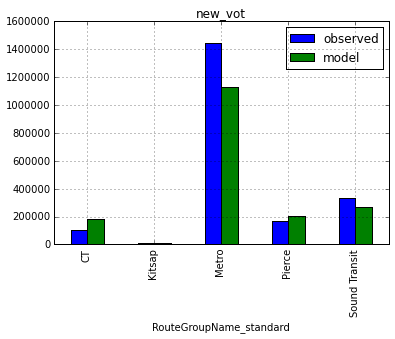

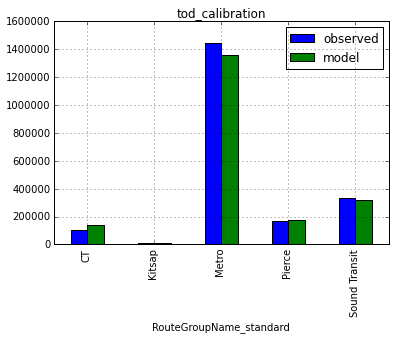

In [180]:
for source in source_list:
    print df_dict[source].groupby('RouteGroupName_standard').sum()[['observed','model']].plot(kind='bar', title=source)



In [181]:
for source in source_list:
    df = df_dict[source].groupby('RouteGroupName_standard').sum()[['observed','model']]
    df['% difference'] = (df['model']-df['observed'])/df['observed']
    print df 
    print "-"*50

                         observed        model  % difference
RouteGroupName_standard                                     
CT                         105558   180,321.81          0.71
Kitsap                       8178     8,193.67          0.00
Metro                     1445250 1,130,052.35         -0.22
Pierce                     168581   203,227.55          0.21
Sound Transit              334863   265,944.66         -0.21
--------------------------------------------------
                         observed        model  % difference
RouteGroupName_standard                                     
CT                         105558   138,765.45          0.31
Kitsap                       8178     9,371.71          0.15
Metro                     1445250 1,357,826.54         -0.06
Pierce                     168581   172,333.10          0.02
Sound Transit              334863   319,355.66         -0.05
--------------------------------------------------


## Boardings Peak/Off-Peak

### By Agency

In [182]:
for source in source_list:
    df = df_dict[source].groupby(['RouteGroupName_standard','BigTimeGroup']).sum()[['model','observed']]
    df['% difference'] = (df['model']-df['observed'])/df['observed']
    print df
    print "-"*75

                                          model  observed  % difference
RouteGroupName_standard BigTimeGroup                                   
CT                      Off-Peak     142,198.48     74462          0.91
                        Peak          38,123.34     31096          0.23
Kitsap                  Off-Peak       7,000.40      6843          0.02
                        Peak           1,193.27      1335         -0.11
Metro                   Off-Peak     948,725.73   1102534         -0.14
                        Peak         181,326.62    342716         -0.47
Pierce                  Off-Peak     166,628.67    140231          0.19
                        Peak          36,598.87     28350          0.29
Sound Transit           Off-Peak     187,383.23    224238         -0.16
                        Peak          78,561.43    110625         -0.29
---------------------------------------------------------------------------
                                          model  observed  %

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


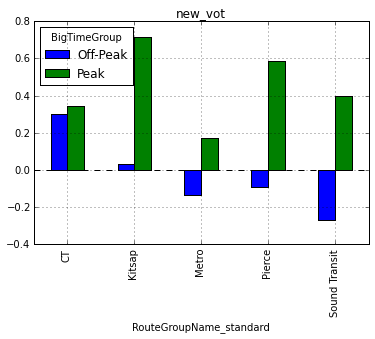

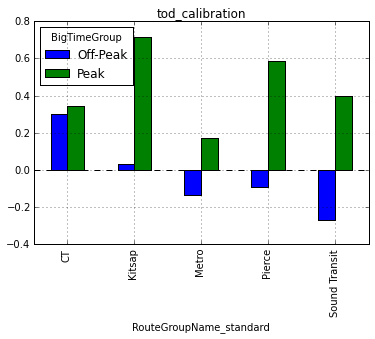

In [183]:
for source in source_list:
    print df.unstack()['% difference'].plot(kind='bar', title=source)

### By Select Routes

In [184]:
for source in source_list:
    df = df_dict[source].groupby(['RouteGroupName_special','BigTimeGroup']).sum()[['model','observed']]
    df['% difference'] = (df['model']-df['observed'])/df['observed']
    print df
    print "-"*75

                                              model  observed  % difference
RouteGroupName_special      BigTimeGroup                                   
RapidRideA                  Off-Peak      74,458.01     94152         -0.21
                            Peak          14,942.52     17544         -0.15
RapidRideB                  Off-Peak      11,471.29     17114         -0.33
                            Peak           2,492.32      5192         -0.52
RapidRideC                  Off-Peak     107,473.36    122208         -0.12
                            Peak          15,194.58     38640         -0.61
RapidRideD                  Off-Peak      66,518.00    109304         -0.39
                            Peak           9,406.41     34392         -0.73
RapidRideE                  Off-Peak      35,793.44     36930         -0.03
                            Peak           6,223.60     10612         -0.41
ST Commuter Rail North      Off-Peak       1,178.57      6896         -0.83
            

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


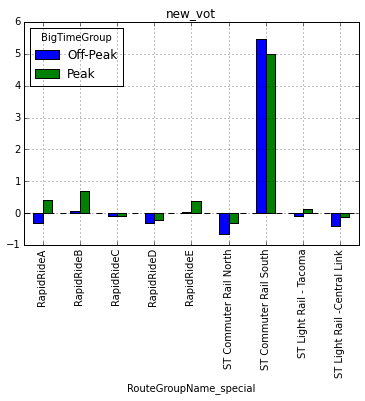

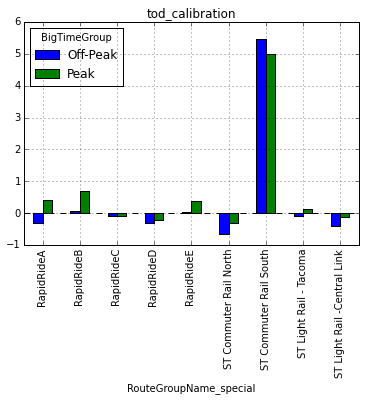

In [185]:
for source in source_list:
    print df.unstack()['% difference'].plot(kind='bar', title=source)